# Recognizing handwritten digits

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-19 01:45:14.395556: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 01:45:15.252792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Load MNIST Handwritten digits dataset

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"""
Shape of X_train: {X_train.shape}
Shape of y_train: {y_train.shape}

Shape of X_test: {X_test.shape}
Shape of y_test: {y_test.shape}
""")


Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)



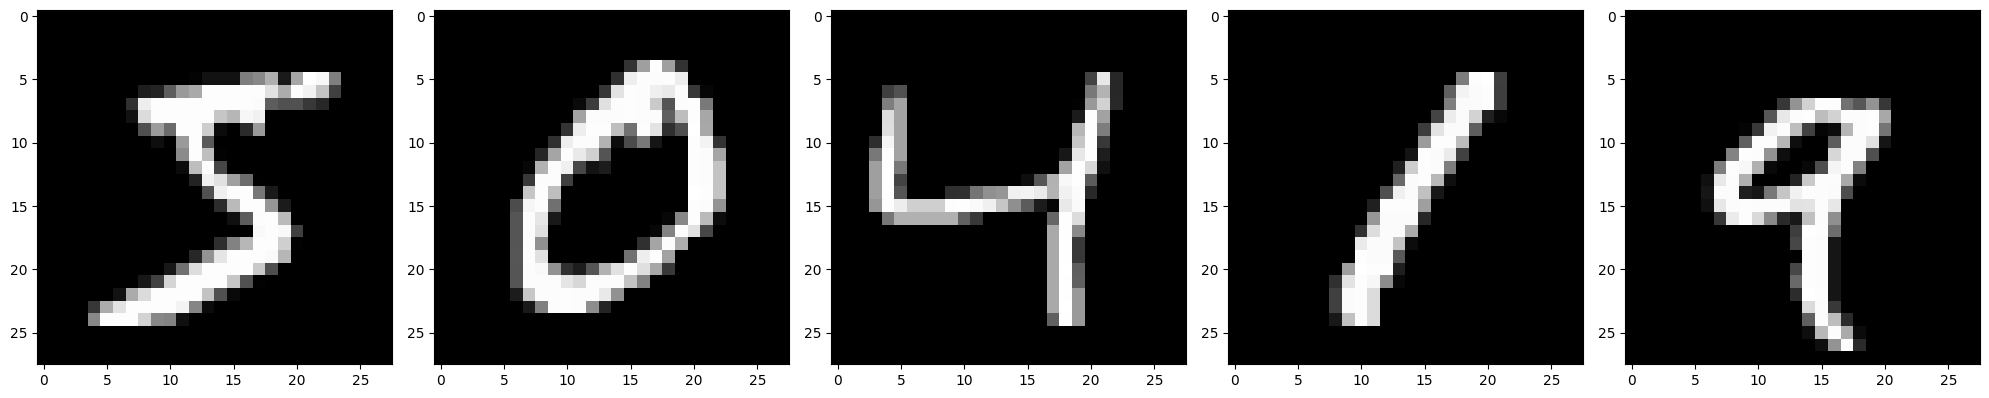

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for img, ax in zip(X_train[:6, :, :], axes):
    ax.imshow(img, cmap="gray")
    
fig.tight_layout()

### Reshape the X_train and X_test

**X_train** from ($60000 \times 28 \times 28$) to ($60000 \times 784$)  
**X_test** from ($10000 \times 28 \times 28$) to ($10000 \times 784$)

In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [6]:
print(f"""
Shape of X_train: {X_train.shape}
Shape of X_test: {X_test.shape}
""")


Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)



### Normalize input to be within $[0, 1]$

In [7]:
X_train /= 255
X_test /= 255

### Turn labels into One-hot encoding

In [8]:
# Before
y_train[:10], y_test[:10]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [9]:
NUMBER_OF_CLASSES = 10

y_train = tf.keras.utils.to_categorical(y_train, NUMBER_OF_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUMBER_OF_CLASSES)

# After
y_train[:1], y_test[:1] 

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]))

### Build model

https://www.baeldung.com/cs/hidden-layers-neural-network  
https://stackoverflow.com/questions/52485608/how-to-choose-the-number-of-hidden-layers-and-nodes

In [10]:
N_HIDDEN = 128 # The number of hidden layer
DROPOUT = 0.3 # Random dropout

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(
    N_HIDDEN,
    input_shape=(X_train.shape[-1],),
    name="dense_layer_1",
    activation="relu"
))

model.add(keras.layers.Dropout(
    DROPOUT,
    name="dropout_layer_2"
))

model.add(keras.layers.Dense(
    N_HIDDEN,
    name="dense_layer_3",
    activation="relu"
))

model.add(keras.layers.Dropout(
    DROPOUT,
    name="dropout_layer_4"
))

model.add(keras.layers.Dense(
    NUMBER_OF_CLASSES,
    name="dense_layer_5",
    activation="softmax"
))

model.summary()

/home/vin/Documents/assignments/computational-intelligence/computational-intelligence-week-5/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-03-19 01:45:17.866884: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-19 01:45:17.868135: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_2 (Dropout)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_3 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer_4 (Dropout)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_5 (Dense)           │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer="SGD", # Stochastic Gradient Descent
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

- `epochs` is the number of times the model is exposed to the training set. At each iteration the optimizer tries to adjust the weights so that the objective function is minimized.

- `batch_size` is the number of training instances observed before the optimizer performs a weight update; there are usually many batches per epoch.

In [12]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=200,
    verbose=0,
    validation_split=0.2
)

In [13]:
def get_history(history):
    train_acc = history["accuracy"]
    train_loss = history["loss"]
    val_acc = history["val_accuracy"]
    val_loss = history["val_loss"]
    
    return train_acc, train_loss, val_acc, val_loss

In [14]:
train_acc, train_loss, val_acc, val_loss = get_history(history.history)

In [15]:
def display_history(train_acc, train_loss, val_acc, val_loss):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    axes[0].plot(range(1, len(train_acc) + 1), train_acc, label="Train Accuracy")
    axes[0].plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy")
    axes[0].legend()
    
    axes[1].plot(range(1, len(train_loss) + 1), train_loss, label="Train Loss")
    axes[1].plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss")
    axes[1].legend()
    
    fig.tight_layout()

### Model 1 Training and Validation Results

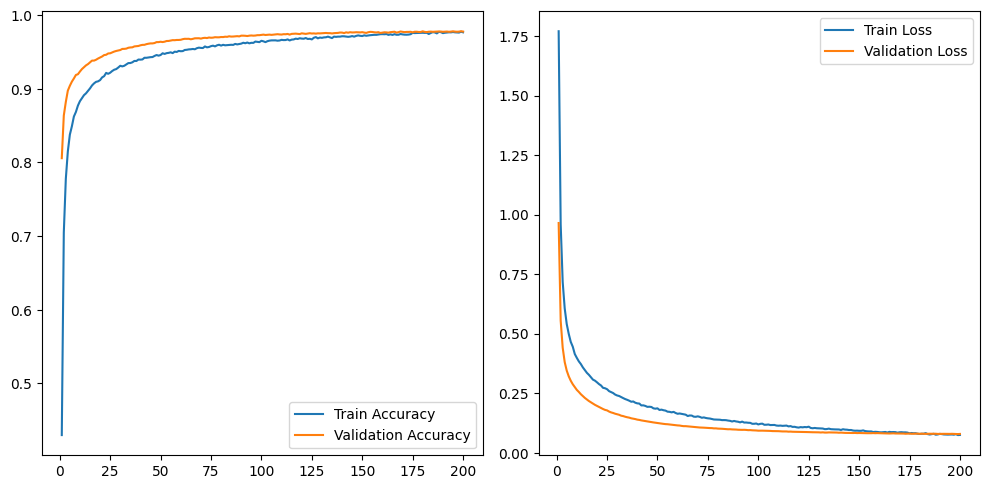

In [16]:
display_history(train_acc, train_loss, val_acc, val_loss)

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9758 - loss: 0.0843


In [18]:
test_acc, test_loss

(0.9785000085830688, 0.07212311774492264)

In [19]:
y_pred = model.predict(X_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


In [20]:
y_pred = np.array(list(map(lambda y: y.index(max(y)),y_pred.tolist())))
y_test = np.array(list(map(lambda y: y.index(max(y)),y_test.tolist())))

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [22]:
confusion_matrix(y_test, y_pred)

array([[ 971,    0,    1,    1,    0,    2,    3,    1,    1,    0],
       [   0, 1126,    2,    1,    0,    1,    2,    1,    2,    0],
       [   4,    0, 1013,    1,    2,    1,    2,    5,    4,    0],
       [   0,    0,    7,  990,    1,    3,    0,    4,    3,    2],
       [   0,    0,    5,    0,  958,    0,    3,    1,    1,   14],
       [   4,    0,    0,   10,    2,  862,    6,    1,    4,    3],
       [   8,    3,    0,    1,    5,    4,  936,    0,    1,    0],
       [   2,    5,    9,    2,    0,    1,    0, 1003,    0,    6],
       [   4,    0,    3,    5,    2,    2,    5,    5,  944,    4],
       [   4,    3,    0,    5,   10,    0,    0,    4,    1,  982]])

In [23]:
import seaborn as sns

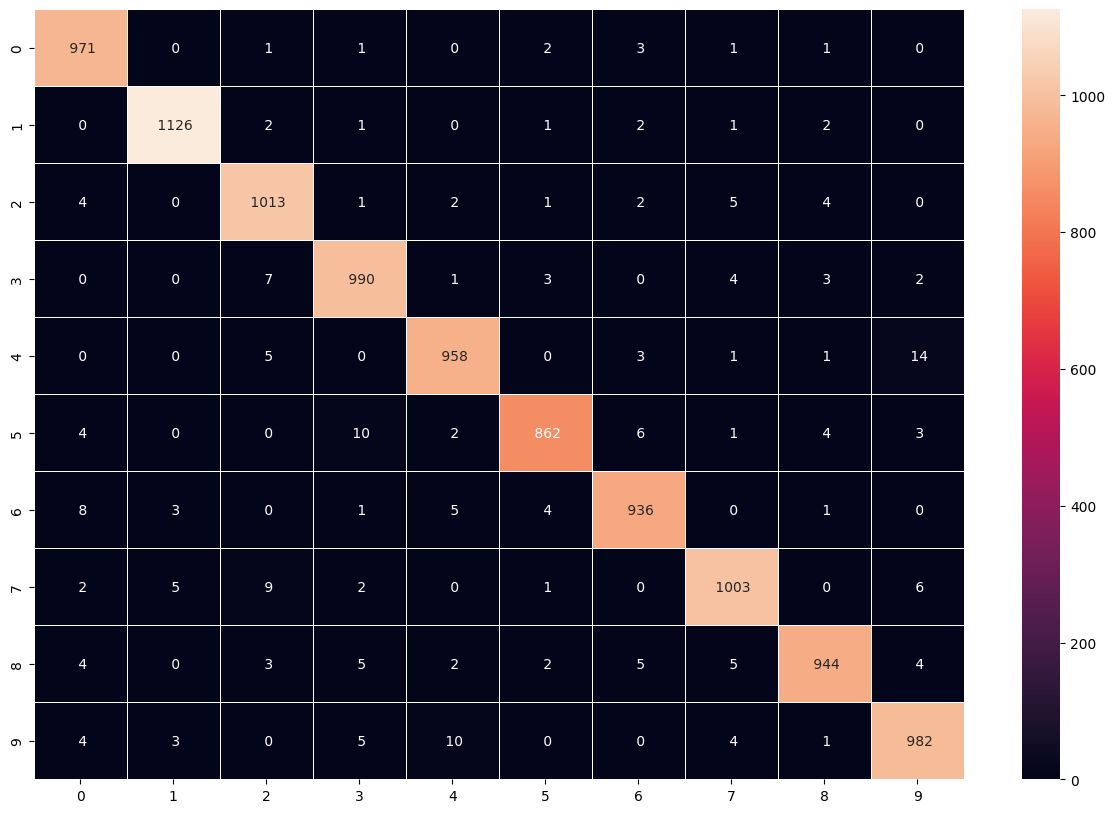

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), fmt=" ", annot=True, linewidths=0.5)
plt.show()

In [25]:
result = classification_report(y_test, y_pred)

In [26]:
print(result)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
precision_score(y_test, y_pred, average="micro")

0.9785

In [28]:
precision_score(y_test, y_pred, average="macro")

0.9784483013197262

In [29]:
recall_score(y_test, y_pred, average="micro")

0.9785

In [30]:
recall_score(y_test, y_pred, average="macro")

0.9781758208281556